# Differential Expression Of the TCGA PAN-CANCER Dataset

***
## Importing the required libraries

***

In [1]:
!pip install leidenalg
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.9 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=6f8efd7a80fb77d7d9a4a59375f9f5c691815b362fca52c6aab47c1a28f83bae
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


In [2]:
import pandas as pd
import scanpy as sc
import matplotlib as mpl

In [3]:
mpl.rcParams['figure.dpi'] =120
mpl.rcParams['figure.figsize'] = [7.0,6.0]

***
## Loading the data and labels of the dataset into a dataframe

***

In [4]:
data = pd.read_csv('../input/pancan/TCGA-PANCAN-HiSeq-801x20531/data.csv', index_col=0)
label = pd.read_csv('../input/pancan/TCGA-PANCAN-HiSeq-801x20531/labels.csv', index_col=0)

***
## Checking the dataset

***

`number of the rows and columns in the data`

In [5]:
rows, columns = data.shape
print(f' The data has {rows} rows and {columns} columns')

 The data has 801 rows and 20531 columns


`checking the first five rows of the data`

In [6]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


`checking to see if there are missing values in the data`

In [7]:
data.isnull().sum().sum()

0

`checking the first five rows of the label`

In [8]:
label.head()

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


`checking for missing values`

In [9]:
label.isnull().sum().sum()

0

`checking for the classes of cancer`

In [10]:
for index,cancer in enumerate(label['Class'].unique()):
    print(index+1,cancer)

1 PRAD
2 LUAD
3 BRCA
4 KIRC
5 COAD


***
## Creating an anndata

***

In [11]:
adata = sc.AnnData(X=data, obs=label)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


`creating a copy of the data for analysis`

In [12]:
adata.raw = adata

***
## Normalization
***

`log(x +1)`

In [13]:
sc.pp.log1p(adata)

`(sample-mean) /standard deviation`

In [14]:
sc.pp.scale(adata)

***
## Dimentionality Reduction with Principal Component Analysis(PCA)

***

... storing 'Class' as categorical


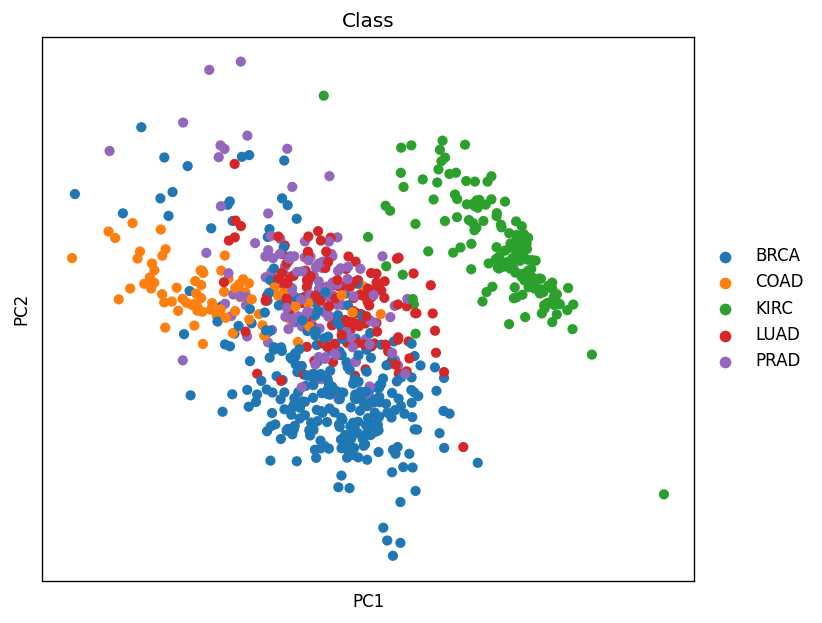

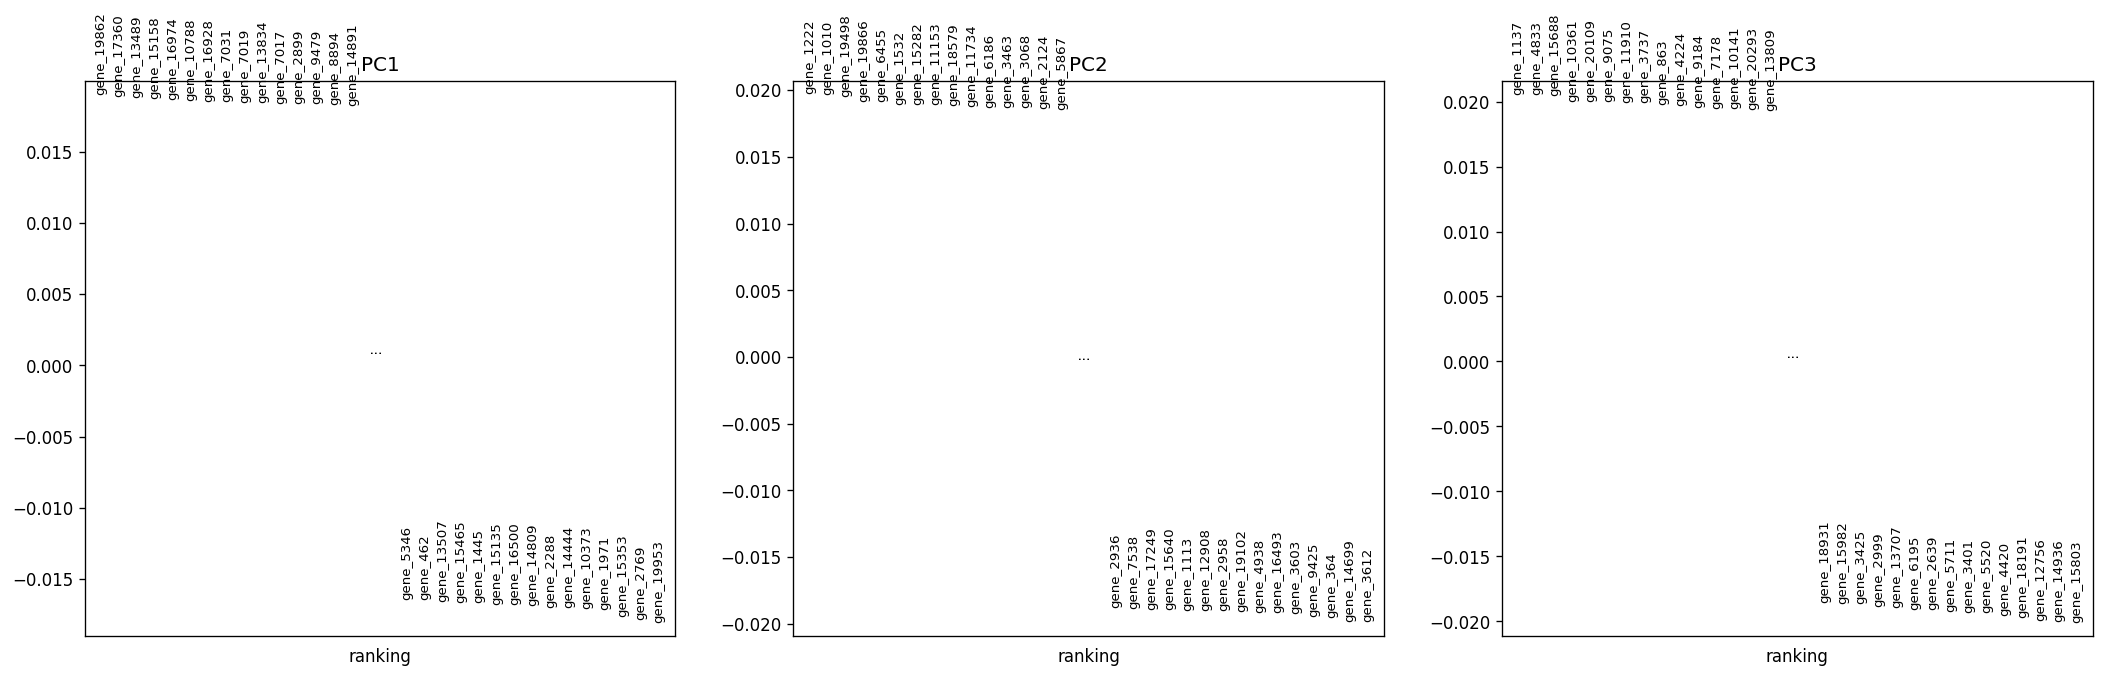

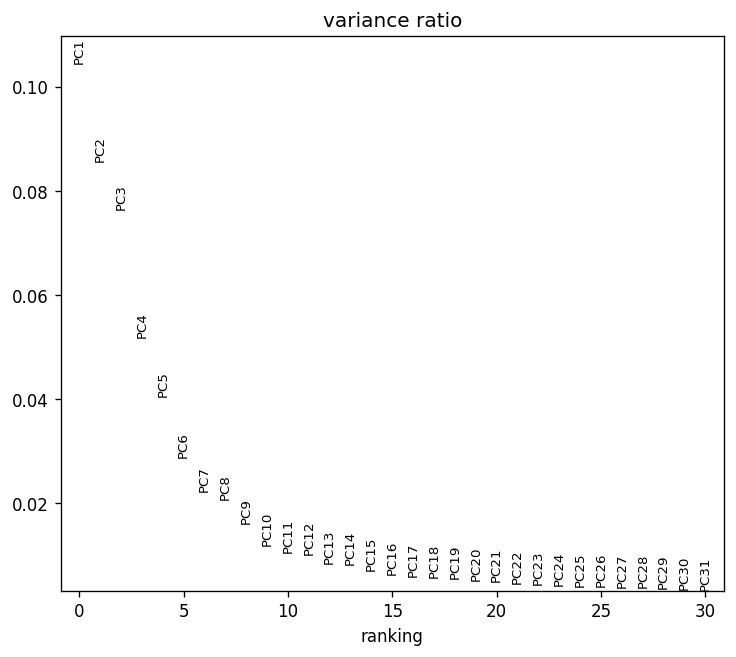

In [15]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_overview(adata, color='Class')

`scree plot`

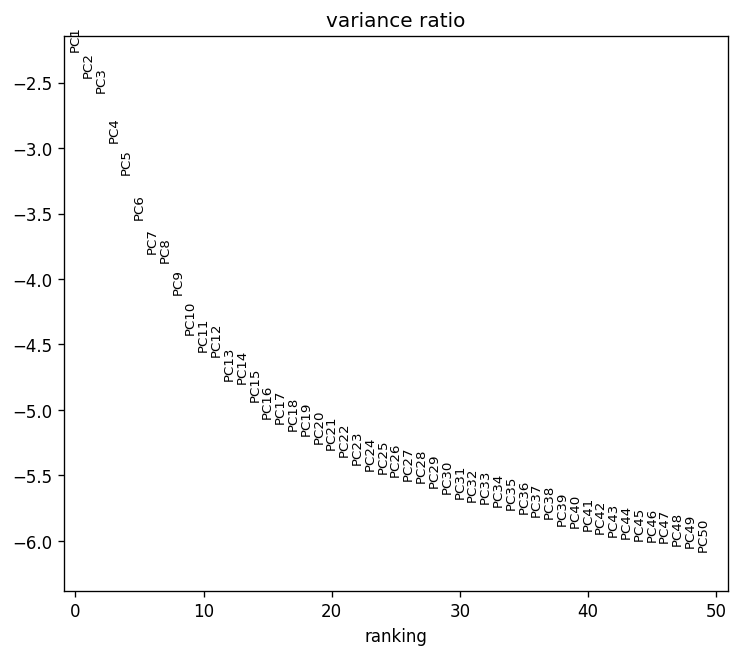

In [16]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

`visualization with T-distributed Stochastic Neighbor Embedding(T-SNE)`

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


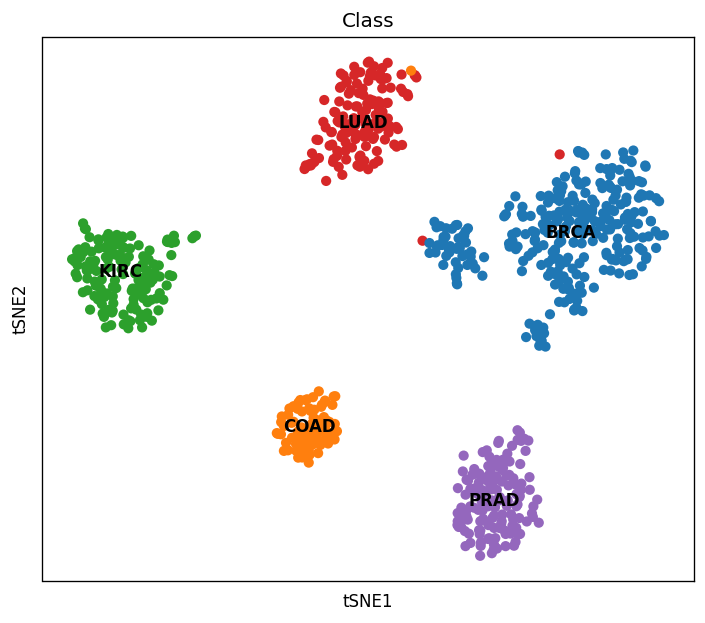

In [17]:
sc.tl.tsne(adata, perplexity =30, learning_rate =50)
sc.pl.tsne(adata, color='Class', legend_loc='on data')

`visualization with Uniform Manifold Approximation and Projection(UMAP)`

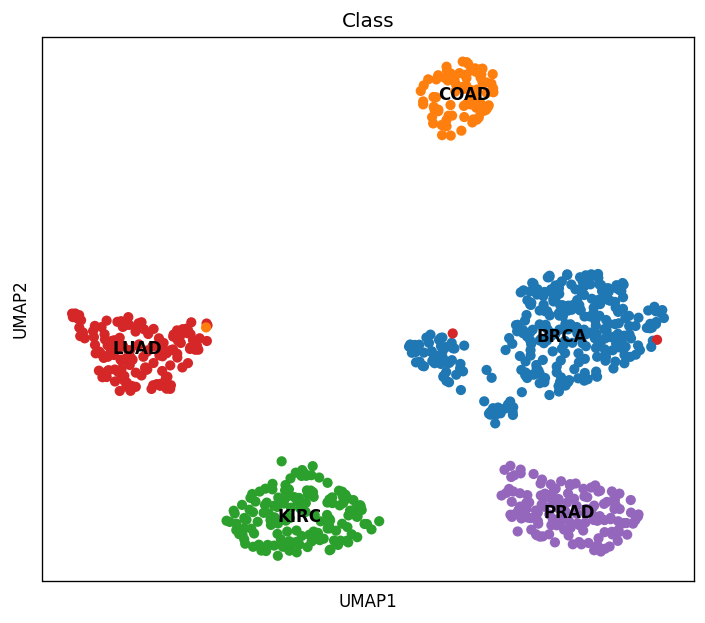

In [18]:
sc.pp.neighbors(adata, n_pcs=40)
sc.tl.umap(adata, n_components=2, min_dist=0.5, spread=1.0, random_state=42)
sc.pl.umap(adata, color='Class', legend_loc='on data')

***
## Clustering with Leiden Algorithm
***

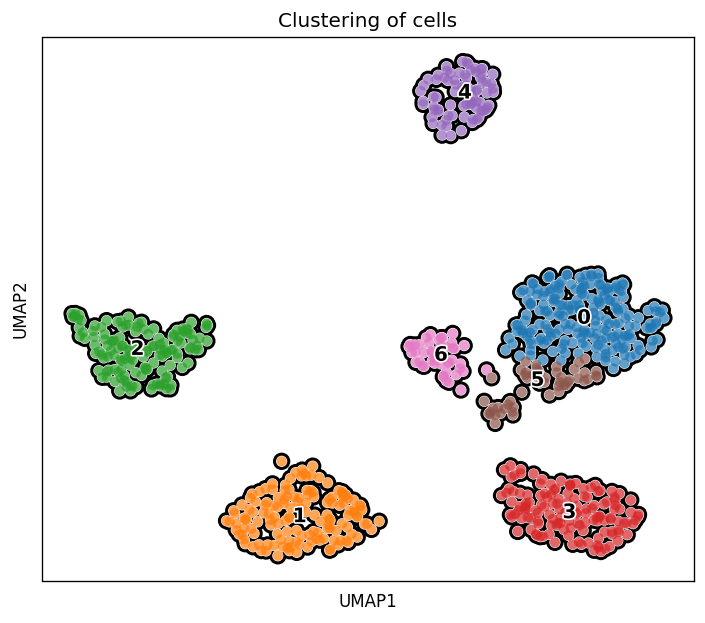

In [19]:
sc.tl.leiden(adata, resolution=0.6, key_added = 'clusters')
sc.pl.umap(adata, color='clusters', add_outline = True, legend_loc ='on data', legend_fontsize =12,legend_fontoutline =2, frameon = True, title= 'Clustering of cells')

***
## Differential Expression using Wilcoxon method
***

In [20]:
sc.tl.rank_genes_groups(adata, groupby='clusters', method = 'wilcoxon')
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head()

,0,1,2,3,4,5,6
0,gene_14092,gene_12983,gene_15898,gene_203,gene_3523,gene_29,gene_6598
1,gene_12990,gene_6733,gene_11903,gene_9176,gene_12013,gene_5424,gene_15155
2,gene_13588,gene_1858,gene_15895,gene_18135,gene_7238,gene_14167,gene_19111
3,gene_17738,gene_1510,gene_15896,gene_9175,gene_3440,gene_5989,gene_760
4,gene_5598,gene_18178,gene_15899,gene_16358,gene_2037,gene_13101,gene_9227


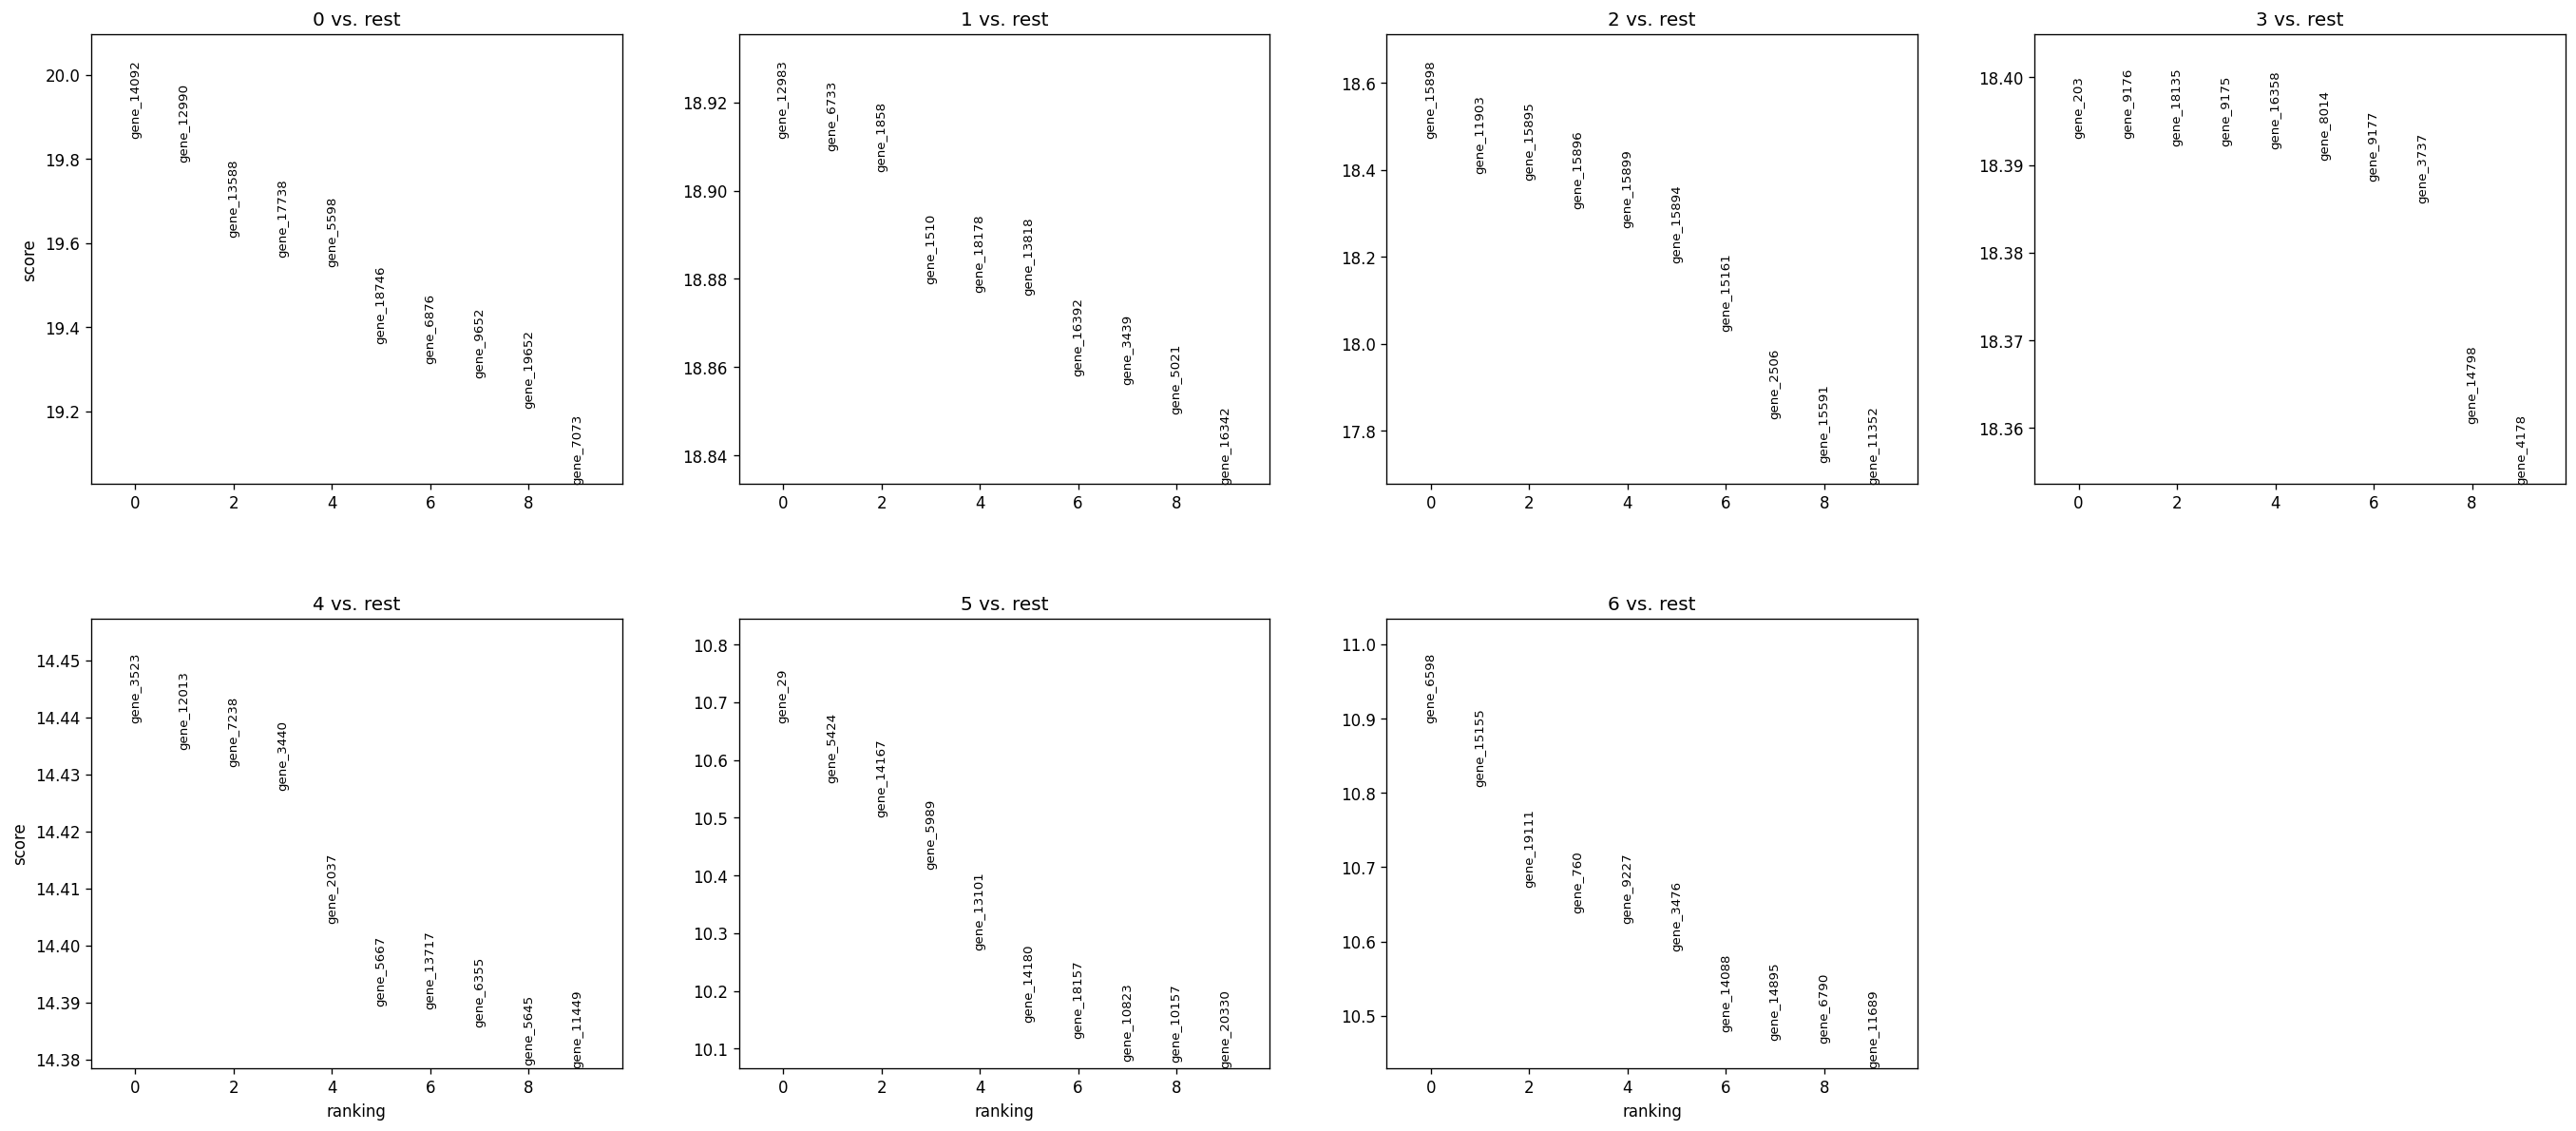

In [21]:
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

***
## Visualization of the top 5 genes 

***

`Dendrogram`

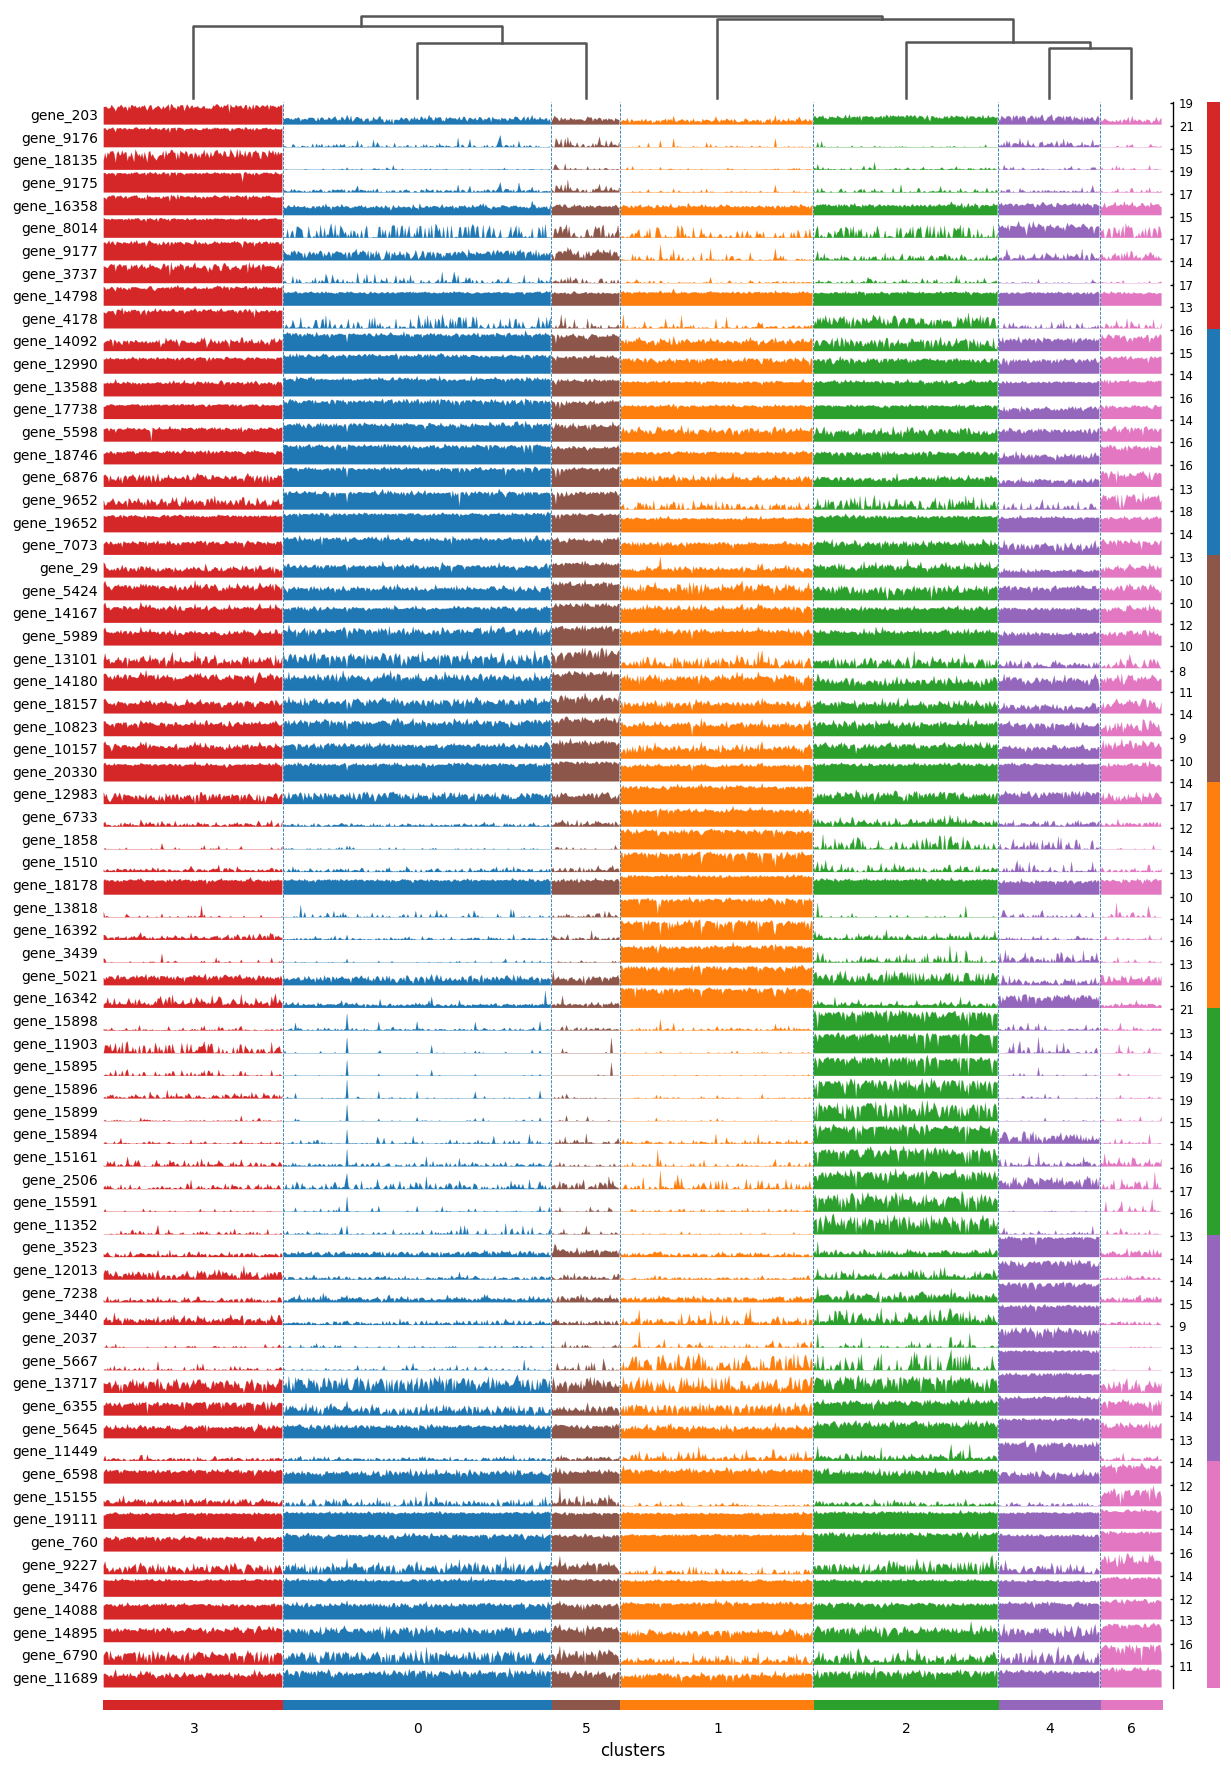

In [22]:
sc.pl.rank_genes_groups_tracksplot(adata, groupby='clusters')

`Heatmap`

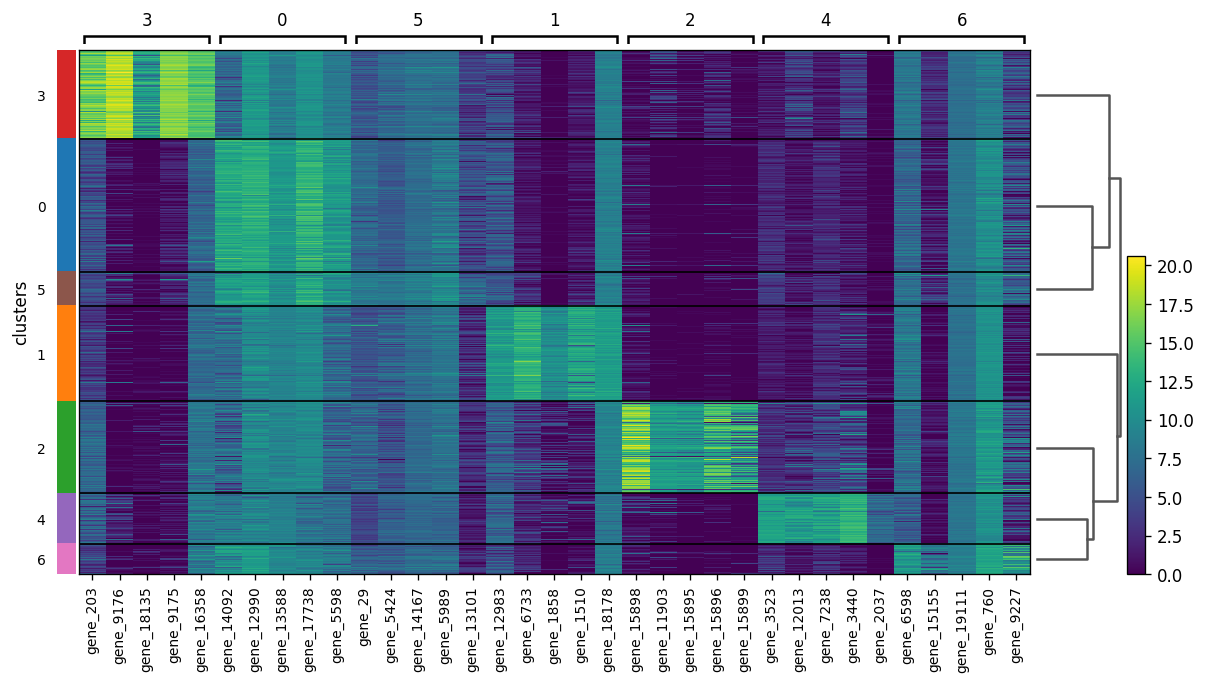

In [23]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, groupby='clusters', show_gene_labels=True)

`Dotplot`

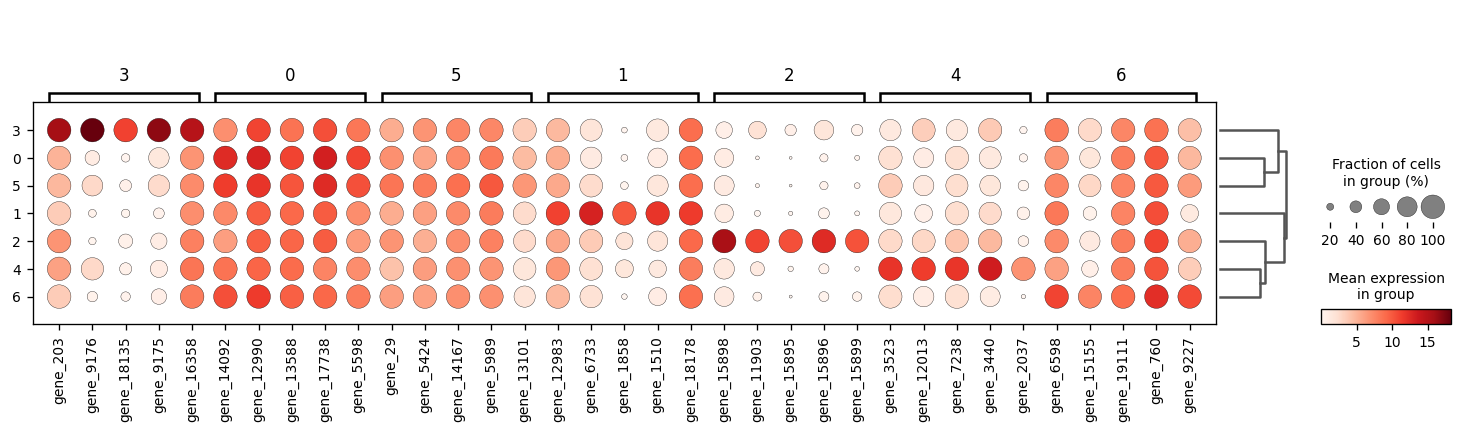

In [24]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, groupby='clusters')

`Violinplot`

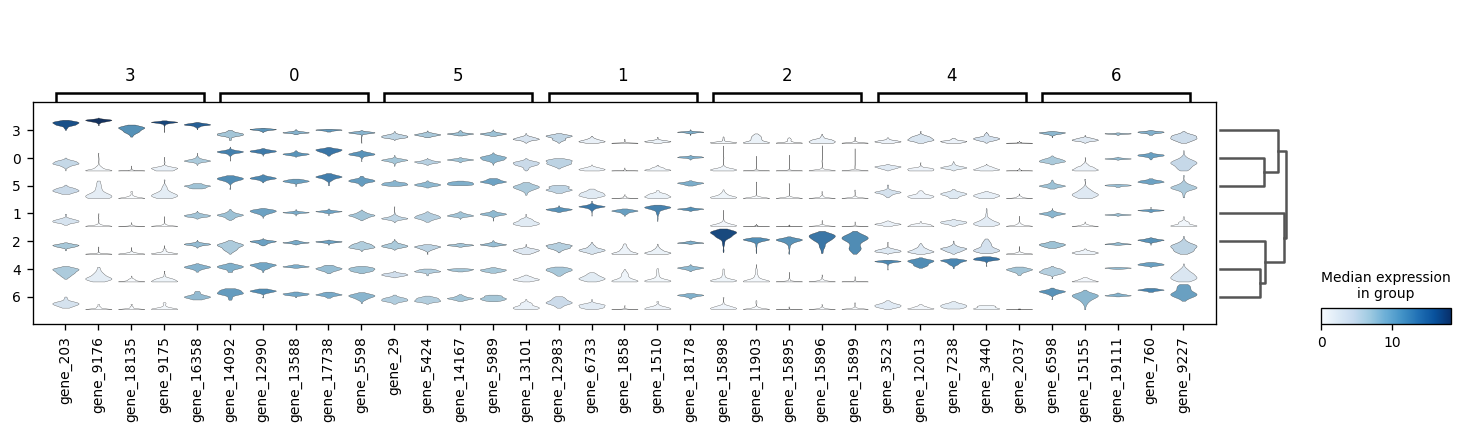

In [25]:
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, groupby='clusters', show_gene_labels=True)

`matrixplot`

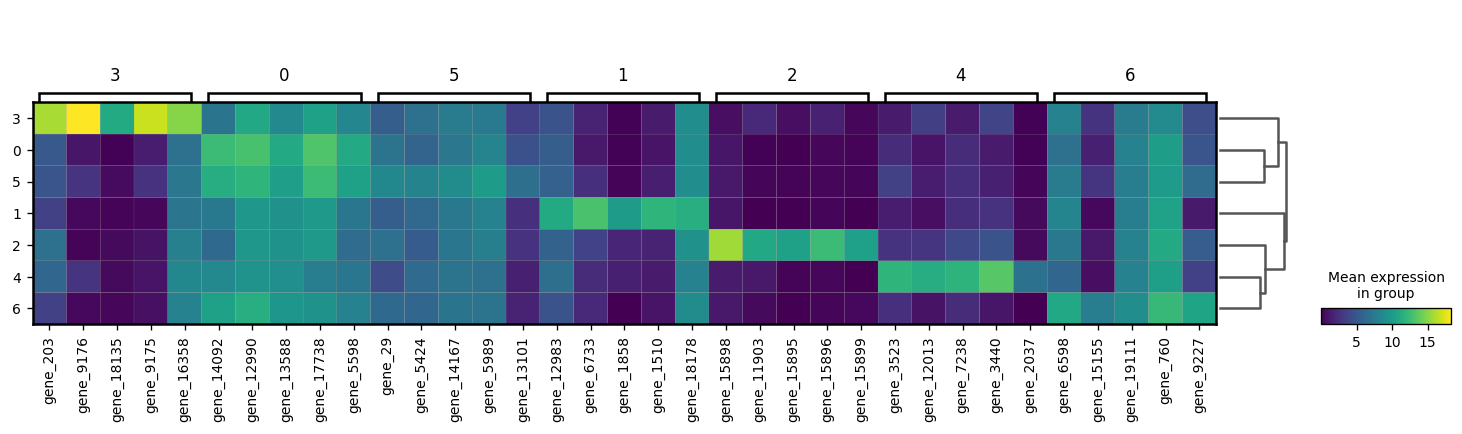

In [26]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5,groupby='clusters',)